# CUSTOMER CHURN PREDICTION PROJECT

## 1. IMPORT LIBRARIES

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

## 2. LOAD DATASET

In [70]:
df = pd.read_excel('/content/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## 3. DATA PREPROCESSING

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [72]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


## 3. DATA CLEANING

In [73]:
df.columns = df.columns.str.strip()
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [74]:
df[['Total Charges', 'Monthly Charges', 'Churn Reason', 'Churn Label']].dtypes

,0
Total Charges,object
Monthly Charges,float64
Churn Reason,object
Churn Label,object


In [75]:
df[['Total Charges', 'Churn Reason']].isnull().sum()

,0
Total Charges,0
Churn Reason,5174


In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Monthly Charges'] = pd.to_numeric(df['Monthly Charges'], errors='coerce')

df['Monthly Charges'].head()

,Monthly Charges
0,53.85
1,70.70
2,99.65
3,104.80
4,103.70


In [78]:
df['Total Charges']   = pd.to_numeric(df['Total Charges'],   errors='coerce')
df['Monthly Charges'] = pd.to_numeric(df['Monthly Charges'], errors='coerce')
print("Tipe data:", df[['Total Charges', 'Monthly Charges']].dtypes)
print("Missing numeric:", df[['Total Charges', 'Monthly Charges']].isnull().sum())

Tipe data: Total Charges      float64
Monthly Charges    float64
dtype: object
Missing numeric: Total Charges      11
Monthly Charges     0
dtype: int64


In [79]:
df['Churn Label'] = df['Churn Label'].astype('category')
print("Dtype Churn Label:", df['Churn Label'].dtype)

Dtype Churn Label: category


## 4. EXPLORATORY DATA ANALYSIS

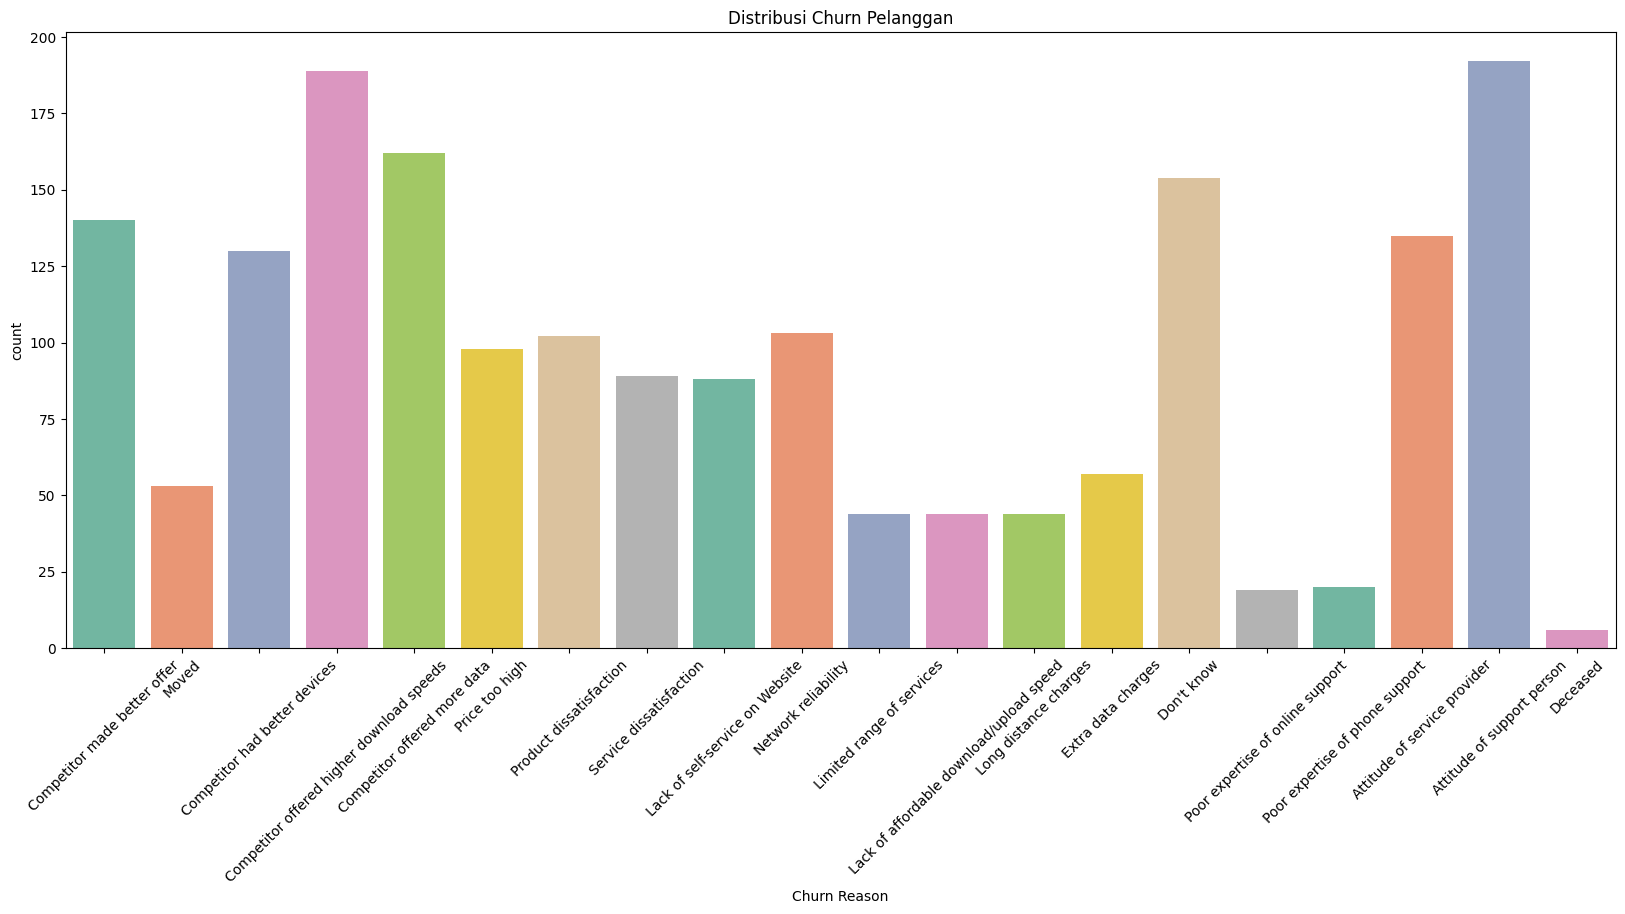

In [80]:
plt.figure(figsize=(20,8))
sns.countplot(x='Churn Reason', hue='Churn Reason', data=df, palette='Set2', legend=False)
plt.title('Distribusi Churn Pelanggan')
plt.xticks(rotation=45)
plt.show()

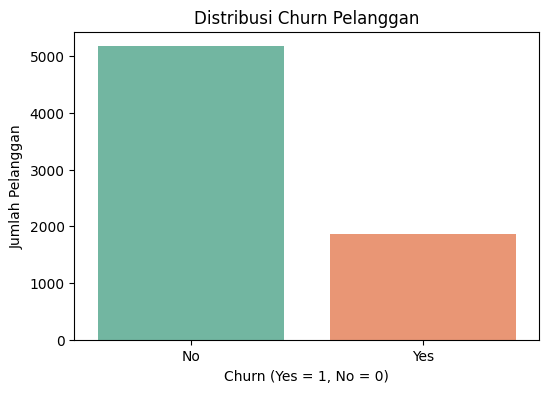

In [81]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn Label', hue='Churn Label', data=df, palette='Set2', legend=False)
plt.title('Distribusi Churn Pelanggan')
plt.xlabel('Churn (Yes = 1, No = 0)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

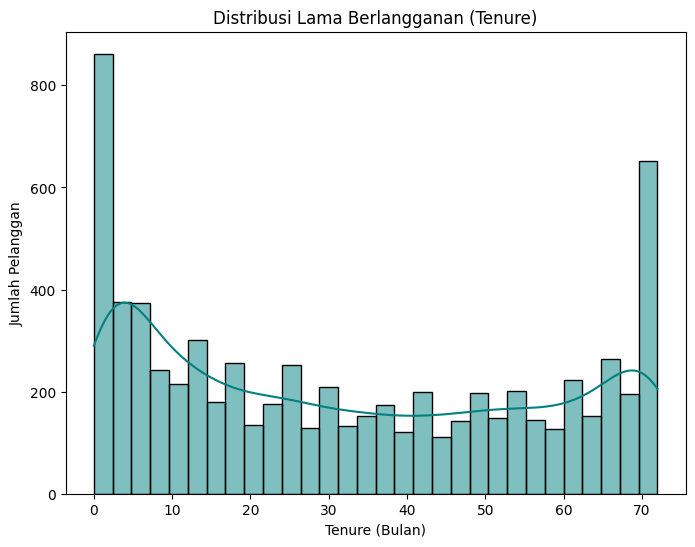

In [82]:
plt.figure(figsize=(8,6))
sns.histplot(df['Tenure Months'], kde=True, color='teal', bins=30)
plt.title('Distribusi Lama Berlangganan (Tenure)')
plt.xlabel('Tenure (Bulan)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

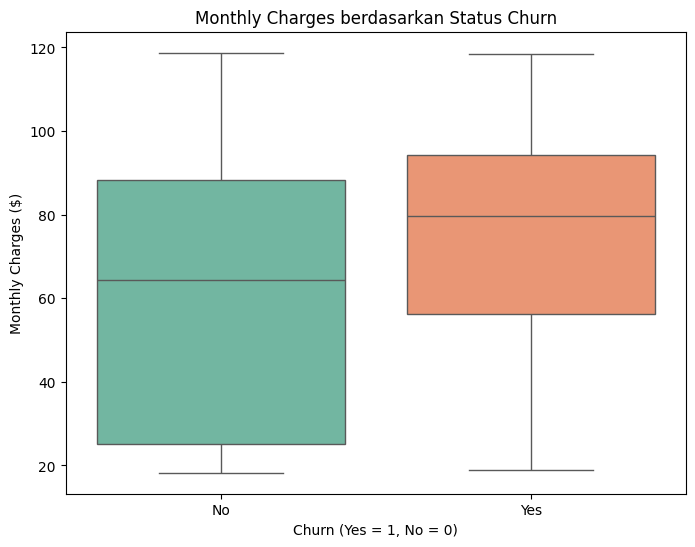

In [83]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x='Churn Label',
    y='Monthly Charges',
    hue='Churn Label',
    data=df,
    dodge=False,
    palette='Set2')

plt.title('Monthly Charges berdasarkan Status Churn')
plt.xlabel('Churn (Yes = 1, No = 0)')
plt.ylabel('Monthly Charges ($)')
plt.show()


## 5. DATA PREPROCESSING

In [84]:
drop_cols = [
    'CustomerID', 'Count', 'Lat Long', 'Churn Reason', 'Churn Label'
]
df_model = df.drop(columns=drop_cols)

In [85]:
X = df_model.drop(columns=['Churn Value'])
y = df_model['Churn Value']

In [86]:
cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.          0.          0.87626633 ...  2.06890615 -1.40580455
   0.58533508]
 [ 0.          0.         -0.41724747 ... -0.31206594  0.76707999
   0.91888586]
 [ 0.          0.         -0.16617231 ...  0.50225333  0.0736062
  -1.7444666 ]
 ...
 [ 0.          0.         -1.26263978 ... -0.83618332  0.0736062
   0.34949109]
 [ 0.          0.          0.831772   ... -0.71309548 -1.31334138
  -1.7453089 ]
 [ 0.          0.          1.15912316 ...  0.34744365  0.30476413
   0.82623287]]
[[ 0.          0.         -0.38228763 ... -0.44644198  1.73794329
  -0.69664545]
 [ 0.          0.          1.20361749 ... -0.53255045  0.02737461
   0.97026616]
 [ 0.          0.          0.91440433 ... -0.98926995 -0.89725711
  -1.82701199]
 ...
 [ 0.          0.         -0.43949463 ... -0.9231754  -1.35957297
   0.80433307]
 [ 0.          0.         -1.11008778 ...  2.29186479 -0.98972028
  -0.25106878]
 [ 0.          0.          1.20361749 ...  0.30366043  0.48969047
  -0.72275675]]


## 6. MODEL BUILDING

In [88]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print("Accuracy RF:", accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1009
           1       0.89      0.85      0.87       400

    accuracy                           0.93      1409
   macro avg       0.92      0.90      0.91      1409
weighted avg       0.93      0.93      0.93      1409

Accuracy RF: 0.9283179559971612


In [89]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print("Accuracy XGB:", accuracy_score(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1009
           1       0.85      0.84      0.85       400

    accuracy                           0.91      1409
   macro avg       0.90      0.89      0.89      1409
weighted avg       0.91      0.91      0.91      1409

Accuracy XGB: 0.9134137686302342


## 7. FEATURE IMPORTANCE

In [90]:
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)


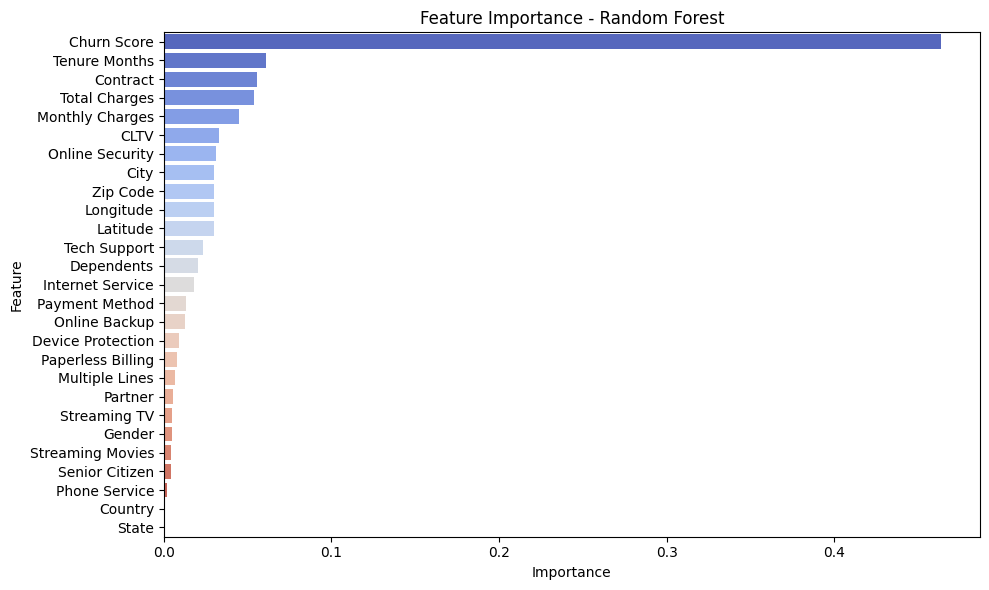

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feat_imp,
    x='importance',
    y='feature',
    hue='feature',
    dodge=False,
    legend=False,
    palette='coolwarm'
)

plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## 8. CONFUSION MATRIX PLOT

In [92]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

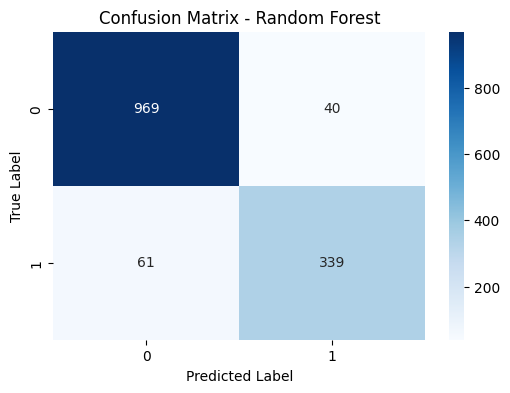

In [93]:
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

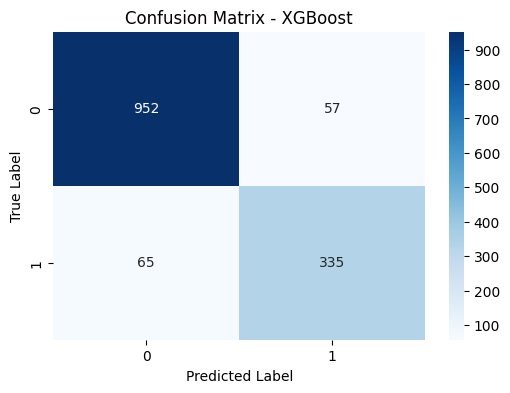

In [94]:
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')

## 9. SAVE MODEL

In [95]:
joblib.dump(rf, 'random_forest_model.pkl')
print("Model Random Forest telah disimpan")

Model Random Forest telah disimpan


In [96]:
loaded_rf = joblib.load('random_forest_model.pkl')
print("Model Random Forest berhasil dimuat")

Model Random Forest berhasil dimuat


In [97]:
y_pred_loaded_rf = loaded_rf.predict(X_test)
print("Accuracy setelah memuat model:", accuracy_score(y_test, y_pred_loaded_rf))

Accuracy setelah memuat model: 0.9283179559971612
